<a href="https://colab.research.google.com/github/vikasShashi-dot/MachineLearning/blob/main/Lab3/LinearMultiLinearReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000


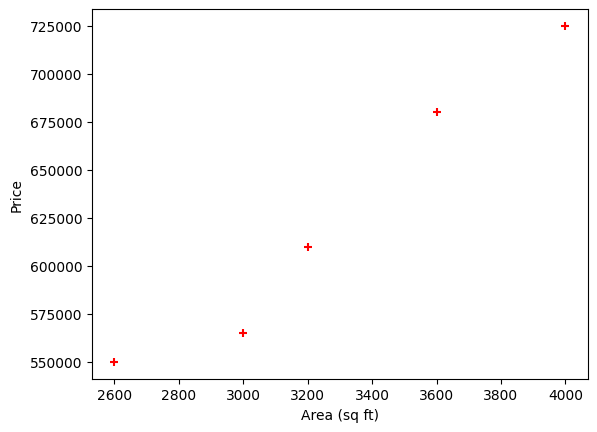

Coefficient (m): 135.78767123287673
Intercept (b): 180616.43835616432
Predicted price for 3300 sq ft: 628715.7534246575
Predicted price for 5000 sq ft: 859554.7945205481


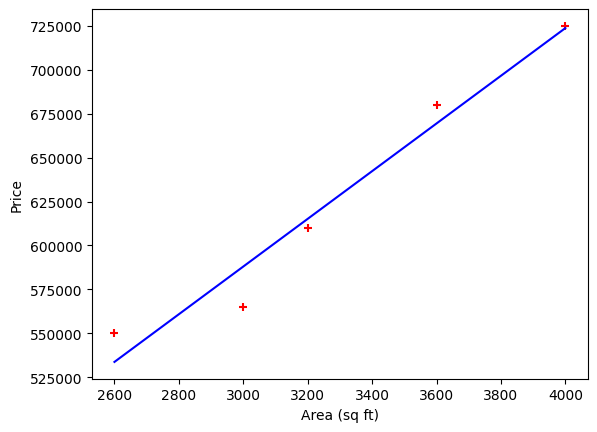

In [2]:


import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/housing_area_price.csv')

print(df.head())

plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.scatter(df['area'], df['price'], color='red', marker='+')
plt.show()

X = df[['area']]
y = df['price']

reg = LinearRegression()
reg.fit(X, y)

print("Coefficient (m):", reg.coef_[0])
print("Intercept (b):", reg.intercept_)

area_3300 = pd.DataFrame({'area': [3300]})
prediction_3300 = reg.predict(area_3300)
print("Predicted price for 3300 sq ft:", prediction_3300[0])

area_5000 = pd.DataFrame({'area': [5000]})
prediction_5000 = reg.predict(area_5000)
print("Predicted price for 5000 sq ft:", prediction_5000[0])

plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.scatter(df['area'], df['price'], color='red', marker='+')
plt.plot(df['area'], reg.predict(X), color='blue')
plt.show()

   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583


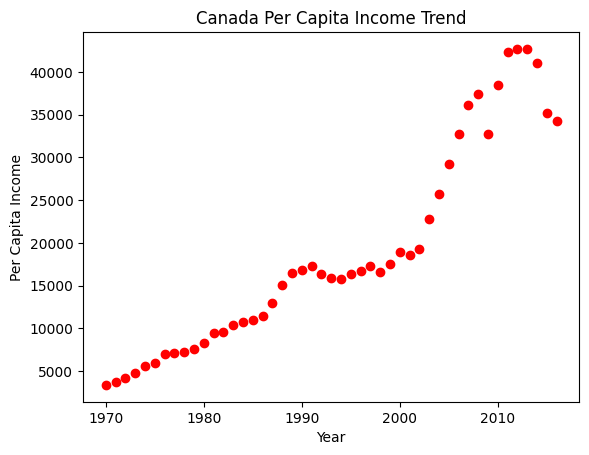

Coefficient: 828.4650752227104
Intercept: -1632210.7578554575
Predicted Per Capita Income in 2020: 41288.69409441762


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


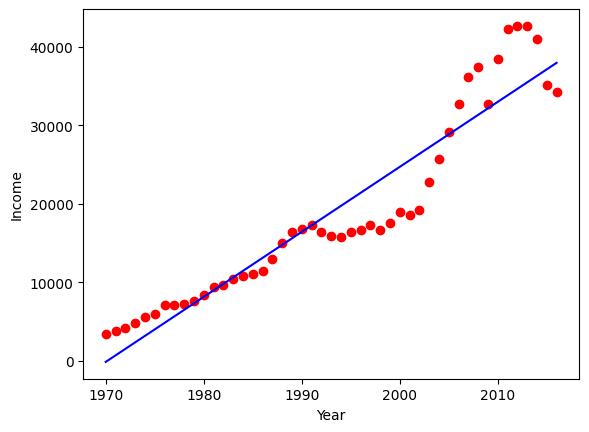

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/sample_data/canada_per_capita_income.csv')

print(df.head())

df.rename(columns={'per capita income (US$)': 'income'}, inplace=True)

plt.scatter(df['year'], df['income'], color='red')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.title('Canada Per Capita Income Trend')
plt.show()

X = df[['year']]
y = df['income']

model = LinearRegression()
model.fit(X, y)

print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

income_2020 = model.predict([[2020]])

print("Predicted Per Capita Income in 2020:", income_2020[0])

plt.scatter(df['year'], df['income'], color='red')
plt.plot(df['year'], model.predict(X), color='blue')
plt.xlabel('Year')
plt.ylabel('Income')
plt.show()

   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891
Coefficient (slope): 9398.640601843543
Intercept: 26265.98773185531
Predicted salary for 12 years of experience: 139049.67


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


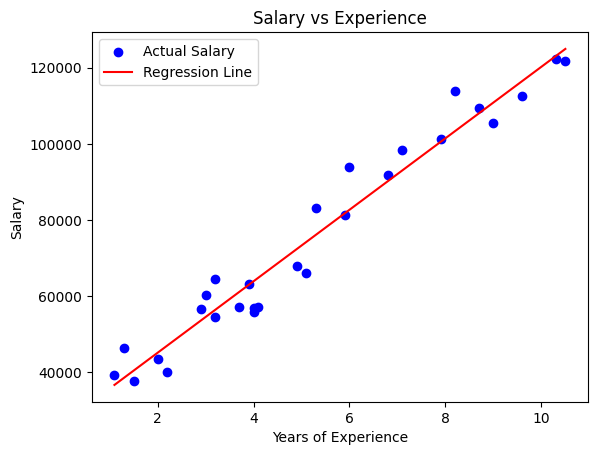

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/salary.csv')

print(df.head())
if df['YearsExperience'].isnull().any() or df['Salary'].isnull().any():
    df = df.dropna()

X = df[['YearsExperience']]
y = df['Salary']
model = LinearRegression()
model.fit(X, y)

print(f"Coefficient (slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

years_exp = 12
predicted_salary = model.predict([[years_exp]])
print(f"Predicted salary for {years_exp} years of experience: {predicted_salary[0]:.2f}")

plt.scatter(X, y, color='blue', label='Actual Salary')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.legend()
plt.show()

   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       NaN   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000

After filling missing values:
   area  bedrooms  age   price
0  2600       3.0   20  550000
1  3000       4.0   15  565000
2  3200       4.0   18  610000
3  3600       3.0   30  595000
4  4000       5.0    8  760000
5  4100       6.0    8  810000

Coefficients: [  112.06244194 23388.88007794 -3231.71790863]
Intercept: 221323.00186540396

Predicted price: 498408.2515803067
Manual calculation: 498408.2515803067


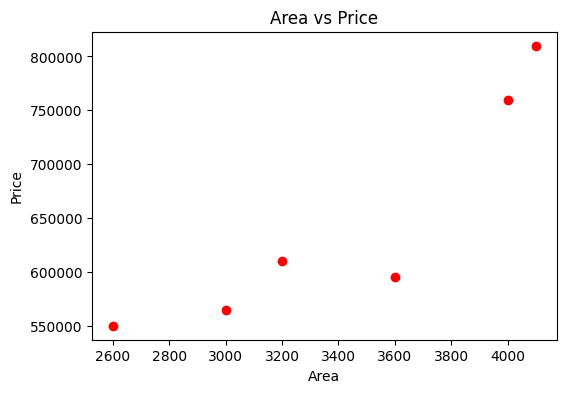

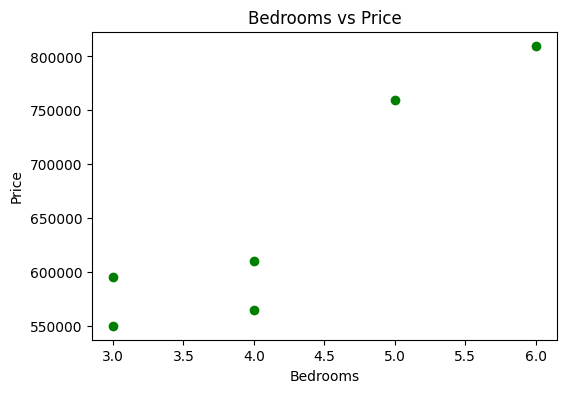

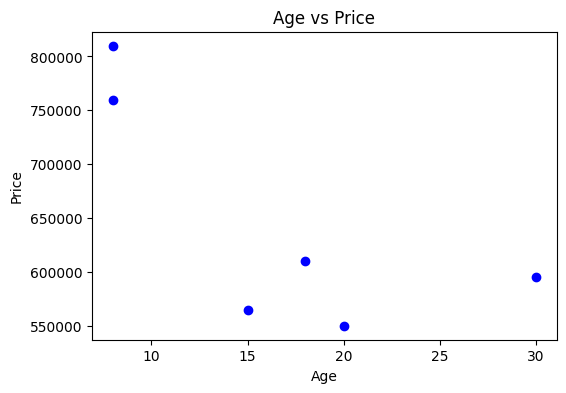

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


df = pd.read_csv('/content/sample_data/homeprices_Multiple_LR.csv')


print(df.head())


median_bedrooms = df['bedrooms'].median()
df['bedrooms'] = df['bedrooms'].fillna(median_bedrooms)

print("\nAfter filling missing values:")
print(df)


X = df.drop('price', axis='columns')
y = df['price']

reg = LinearRegression()
reg.fit(X, y)

print("\nCoefficients:", reg.coef_)
print("Intercept:", reg.intercept_)


new_house = pd.DataFrame({
    'area': [3000],
    'bedrooms': [3],
    'age': [40]
})

prediction = reg.predict(new_house)
print("\nPredicted price:", prediction[0])

price_manual = (
    reg.coef_[0]*3000 +
    reg.coef_[1]*3 +
    reg.coef_[2]*40 +
    reg.intercept_
)

print("Manual calculation:", price_manual)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df['area'], df['price'], color='red')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['bedrooms'], df['price'], color='green')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Bedrooms vs Price')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(df['age'], df['price'], color='blue')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Age vs Price')
plt.show()

In [10]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

df = pd.read_csv('/content/sample_data/hiring.csv')

print("Original Data:")
print(df)

df['experience'] = df['experience'].fillna(0)

word_to_num = {
    'zero':0, 'one':1, 'two':2, 'three':3, 'four':4,
    'five':5, 'six':6, 'seven':7, 'eight':8,
    'nine':9, 'ten':10, 'eleven':11, 'twelve':12
}

df['experience'] = df['experience'].replace(word_to_num)
df['experience'] = pd.to_numeric(df['experience'])

df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median()) # Corrected column name

print("\nAfter Preprocessing:")
print(df)


X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]
y = df['salary($)']

model = LinearRegression()
model.fit(X, y)

print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


candidate1 = pd.DataFrame({
    'experience': [2],
    'test_score(out of 10)': [9],
    'interview_score(out of 10)': [6]
})

salary1 = model.predict(candidate1)
print("\nPredicted Salary (2 yr, 9 test, 6 interview):", salary1[0])

candidate2 = pd.DataFrame({
    'experience': [12],
    'test_score(out of 10)': [10],
    'interview_score(out of 10)': [10]
})

salary2 = model.predict(candidate2)
print("Predicted Salary (12 yr, 10 test, 10 interview):", salary2[0])


Original Data:
  experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0        NaN                    8.0                           9      50000
1        NaN                    8.0                           6      45000
2       five                    6.0                           7      60000
3        two                   10.0                          10      65000
4      seven                    9.0                           6      70000
5      three                    7.0                          10      62000
6        ten                    NaN                           7      72000
7     eleven                    7.0                           8      80000

After Preprocessing:
   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                        

/tmp/ipython-input-2169918986.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience'] = df['experience'].replace(word_to_num)


In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/sample_data/1000_Companies.csv')

print("Original Data:")
print(df.head())

df_encoded = pd.get_dummies(df, columns=['State'], drop_first=True)

X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

print("\nModel Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

state_columns = [col for col in df_encoded.columns if 'State_' in col]
input_data = {col: 0 for col in state_columns}

state_column_name = 'State_Florida'
if state_column_name in input_data:
    input_data[state_column_name] = 1

input_data['R&D Spend'] = 91694.48
input_data['Administration'] = 515841.3
input_data['Marketing Spend'] = 11931.24

input_df = pd.DataFrame([input_data])

input_df = input_df[X.columns]

input_scaled = scaler.transform(input_df)

predicted_profit = model.predict(input_scaled)
print(f"\nPredicted Profit: {predicted_profit[0]:.2f}")

Original Data:
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

Model Coefficients: [25729.35093308 12938.52649877  7422.02656441  -208.55555495
    46.09221969]
Model Intercept: 119546.16465561

Predicted Profit: 510570.99
